Построим графики зависимости асимптотической сложности добавления элемента от размера массива:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
str1 = 'output/str1.txt'
str2 = 'output/str2.txt'
str3 = 'output/str3.txt'

data1 = pd.read_csv(str1, sep=' ', header=None)
data2 = pd.read_csv(str2, sep=' ', header=None)
data3 = pd.read_csv(str3, sep=' ', header=None)

Графики в линейных координатах:

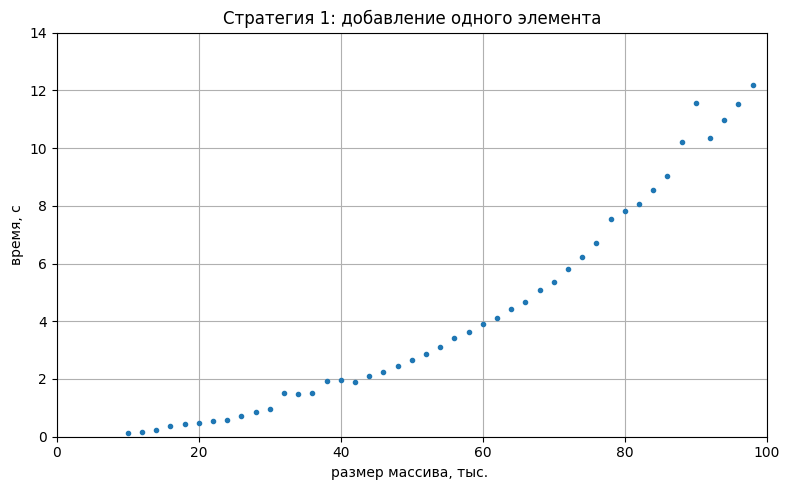

In [3]:
from matplotlib.ticker import FuncFormatter

n = data1[0]
time = data1[1]

def formatter(n, pos):
    return f'{n / 1000:.0f}'


plt.figure(figsize=(8, 5))
plt.plot(n, time, '.')
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatter))
plt.xlabel('размер массива, тыс. ')
plt.ylabel('время, с')
plt.title('Стратегия 1: добавление одного элемента')
plt.xlim(0, 100000)
plt.ylim(0, 14)
plt.tight_layout()
plt.grid()
plt.show()

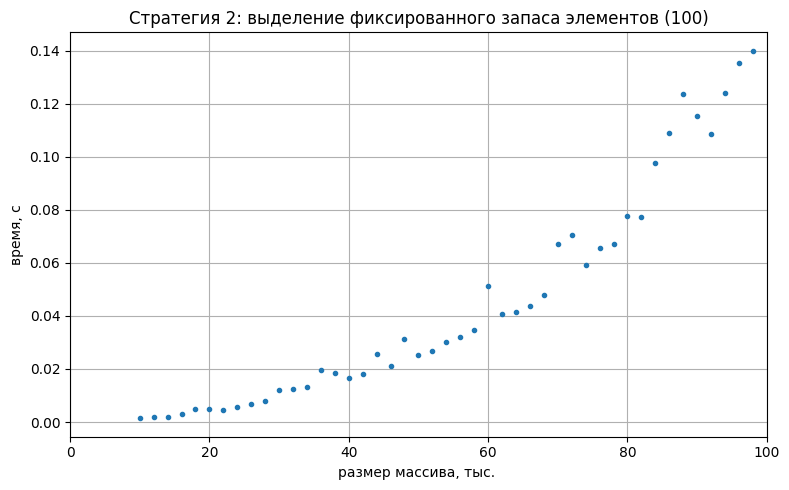

In [4]:
n = data2[0]
time = data2[1]

def formatter(n, pos):
    return f'{n / 1000:.0f}'


plt.figure(figsize=(8, 5))
plt.plot(n, time, '.')
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatter))
plt.xlabel('размер массива, тыс. ')
plt.ylabel('время, с')
plt.title('Стратегия 2: выделение фиксированного запаса элементов (100)')
plt.xlim(0, 100000)
plt.ylim()
plt.tight_layout()
plt.grid()
plt.show()

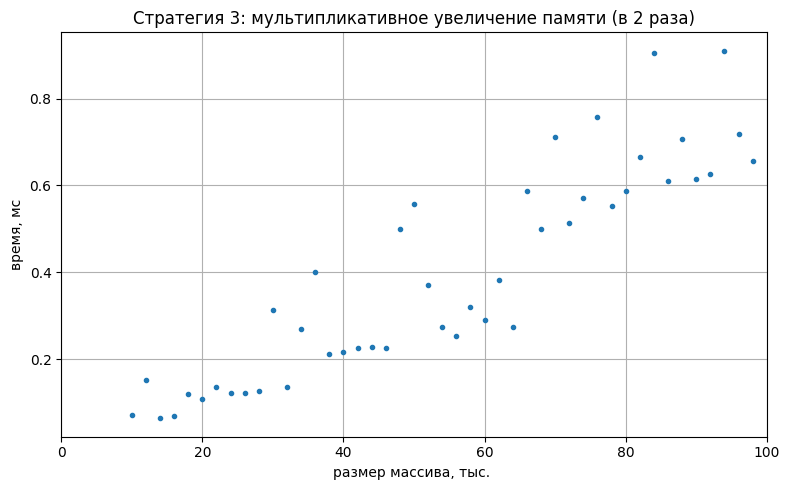

In [5]:
n = data3[0]
time = data3[1]

def formatterx(n, pos):
    return f'{n / 1000:.0f}'
def formattery(time, pos):
    return f'{time * 1000:.1f}'


plt.figure(figsize=(8, 5))
plt.plot(n, time, '.')
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatterx))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formattery))
plt.xlabel('размер массива, тыс. ')
plt.ylabel('время, мс')
plt.title('Стратегия 3: мультипликативное увеличение памяти (в 2 раза)')
plt.xlim(0, 100000)
plt.ylim()
plt.tight_layout()
plt.grid()
plt.show()

Теперь построим графики в логарифмическом масштабе:

Степень полиномиальной сложности первой стратегии: ( 1.9759341916854933 ± 0.023322121843080055 )
Степень полиномиальной сложности второй стратегии: ( 2.045849177887711 ± 0.03787965803855763 )
Степень полиномиальной сложности третьей стратегии: ( 1.1177183655032936 ± 0.07210106383059162 )


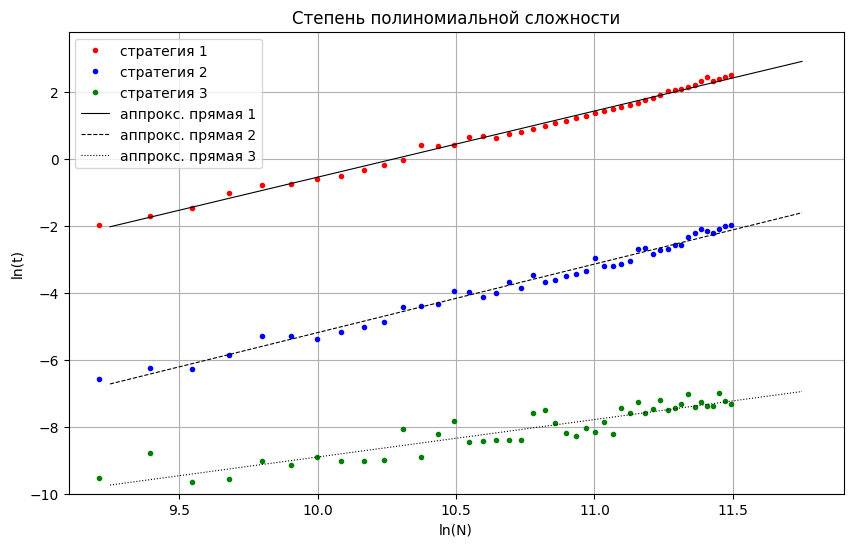

In [6]:
n1 = data1[0]
time1 = data1[1]
n2 = data2[0]
time2 = data2[1]
n3 = data3[0]
time3 = data3[1]

x1 = np.log(n1)
y1 = np.log(time1)
x2 = np.log(n2)
y2 = np.log(time2)
x3 = np.log(n3)
y3 = np.log(time3)

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, '.', color = 'red', label='стратегия 1')
plt.plot(x2, y2, '.', color = 'blue', label='стратегия 2')
plt.plot(x3, y3, '.', color = 'green', label='стратегия 3')

plt.xlabel('ln(N)')
plt.ylabel('ln(t)')
plt.title('Степень полиномиальной сложности')
plt.xlim(9.1, 11.9)
plt.ylim(-10, 3.8)

x0 = np.linspace(9.25, 11.75, num = 10, dtype = float)
uv = x1 * y1
vv = x1 * x1
uu = y1 * y1
k1 = (uv.mean() - x1.mean()*y1.mean()) / (vv.mean() - x1.mean()**2)
b1 = y1.mean() - k1 * x1.mean()

a1 = k1 * x0 + b1
plt.plot(x0, a1, linewidth = 0.8, color = 'black', label='аппрокс. прямая 1')
sigma1 = (((uu.mean()-y1.mean()**2)/ (vv.mean()-x1.mean()**2)) - k1**2) ** 0.5 / (45**0.5)
print('Степень полиномиальной сложности первой стратегии: (', k1, '±', sigma1, ')')


uv = x2 * y2
vv = x2 * x2
uu = y2 * y2
k2 = (uv.mean() - x2.mean()*y2.mean()) / (vv.mean() - x2.mean()**2)
b2 = y2.mean() - k2 * x2.mean()

a2 = k2 * x0 + b2
plt.plot(x0, a2, linewidth = 0.8, color = 'black', linestyle = '--', label='аппрокс. прямая 2')
sigma2 = (((uu.mean()-y2.mean()**2)/ (vv.mean()-x2.mean()**2)) - k2**2) ** 0.5 / (45**0.5)
print('Степень полиномиальной сложности второй стратегии: (', k2, '±', sigma2, ')')


uv = x3 * y3
vv = x3 * x3
uu = y3 * y3
k3 = (uv.mean() - x3.mean()*y3.mean()) / (vv.mean() - x3.mean()**2)
b3 = y3.mean() - k3 * x3.mean()

a3 = k3 * x0 + b3
plt.plot(x0, a3, linewidth = 0.8, color = 'black', linestyle = ':', label='аппрокс. прямая 3')
sigma3 = (((uu.mean()-y3.mean()**2)/ (vv.mean()-x3.mean()**2)) - k3**2) ** 0.5 / (45**0.5)
print('Степень полиномиальной сложности третьей стратегии: (', k3, '±', sigma3, ')')

plt.legend()
plt.grid()
plt.show()

Вторая часть. Амортизированная асимптотическая сложность операций queue_push и queue_poll:

Степень амортизированной асимптотической сложности операции queue_poll: ( 0.8481751439810011 ± 0.040584825165696656 )
Степень амортизированной асимптотической сложности операции queue_push: ( 0.8050070696336908 ± 0.035735057576135425 )


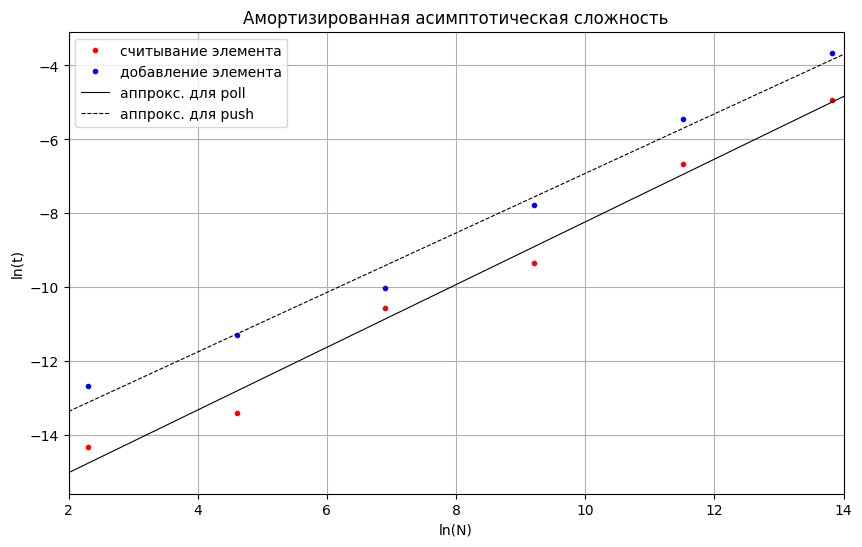

In [11]:
poll = 'output/poll.txt'
push = 'output/push.txt'

poll_data = pd.read_csv(poll, sep=' ', header=None)
push_data = pd.read_csv(push, sep=' ', header=None)

n1 = poll_data[0]
time1 = poll_data[1]
n2 = push_data[0]
time2 = push_data[1]

x1 = np.log(n1)
y1 = np.log(time1)
x2 = np.log(n2)
y2 = np.log(time2)

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, '.', color = 'red', label='cчитывание элемента')
plt.plot(x2, y2, '.', color = 'blue', label='добавление элемента')


plt.xlabel('ln(N)')
plt.ylabel('ln(t)')
plt.title('Амортизированная асимптотическая сложность')
plt.xlim(2, 14)
plt.ylim()

x0 = np.linspace(2, 14, num = 10, dtype = float)
uv = x1 * y1
vv = x1 * x1
uu = y1 * y1
k1 = (uv.mean() - x1.mean()*y1.mean()) / (vv.mean() - x1.mean()**2)
b1 = y1.mean() - k1 * x1.mean()

a1 = k1 * x0 + b1
plt.plot(x0, a1, linewidth = 0.8, color = 'black', label='аппрокс. для poll')
sigma1 = (((uu.mean()-y1.mean()**2)/ (vv.mean()-x1.mean()**2)) - k1**2) ** 0.5 / (6**0.5)
print('Степень амортизированной асимптотической сложности операции queue_poll: (', k1, '±', sigma1, ')')


uv = x2 * y2
vv = x2 * x2
uu = y2 * y2
k2 = (uv.mean() - x2.mean()*y2.mean()) / (vv.mean() - x2.mean()**2)
b2 = y2.mean() - k2 * x2.mean()

a2 = k2 * x0 + b2
plt.plot(x0, a2, linewidth = 0.8, color = 'black', linestyle = '--', label='аппрокс. для push')
sigma2 = (((uu.mean()-y2.mean()**2)/ (vv.mean()-x2.mean()**2)) - k2**2) ** 0.5 / (6**0.5)
print('Степень амортизированной асимптотической сложности операции queue_push: (', k2, '±', sigma2, ')')


plt.legend()
plt.grid()
plt.show()